<h1><center>Influence des paramètres - Noyau</center></h1>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/DiouaneAbdallah/influence-Hyperparametres-SVM-avec-des-visualisations/blob/main/InfluenceDesParamètres-Noyau.ipynb)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [4]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

In [5]:
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [6]:
iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

In [42]:
models = (svm.SVC(kernel='linear', C=10), 
          svm.SVC(kernel='rbf', gamma=0.7, C=10),
          svm.SVC(kernel='poly', degree=3, C=10))

models = (clf.fit(X, y) for clf in models)

D:\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


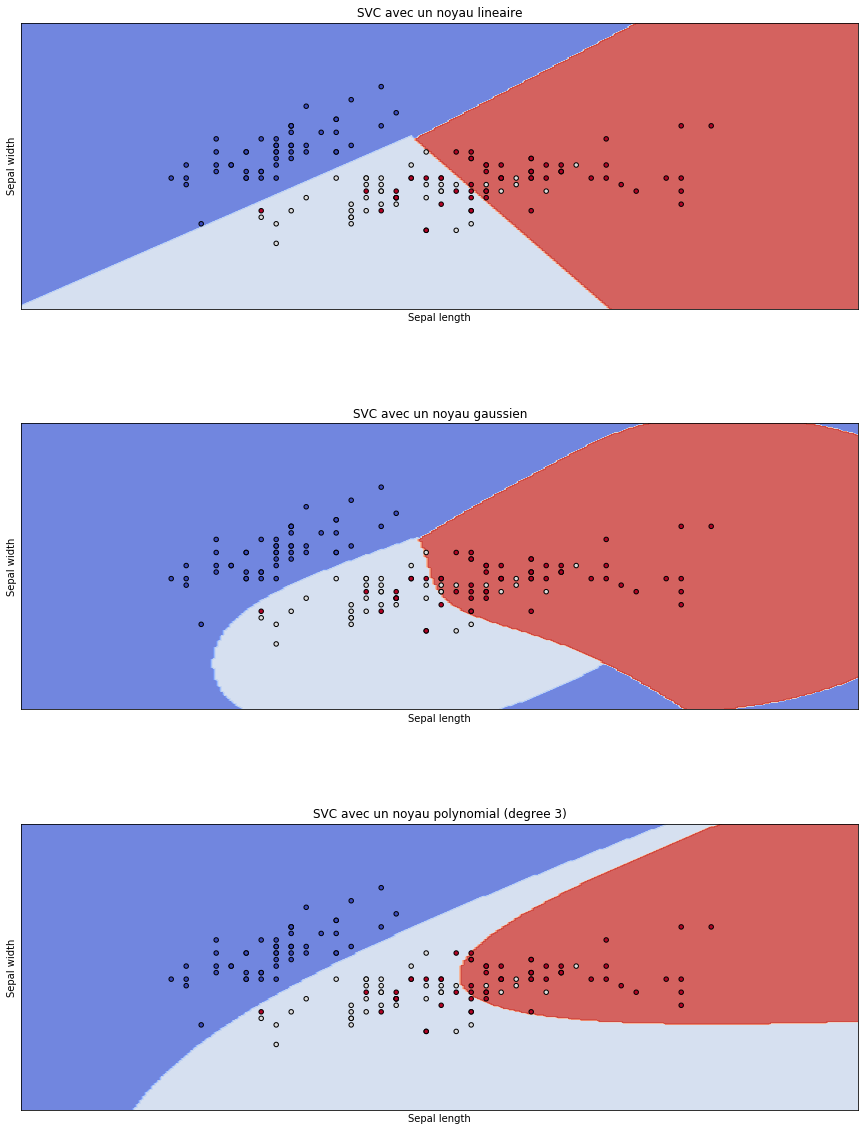

In [43]:
titles = ('SVC avec un noyau lineaire', 'SVC avec un noyau gaussien', 'SVC avec un noyau polynomial (degree 3)')

fig, sub = plt.subplots(3, 1,figsize=(15,20))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()